Projeto de Machine Learning utilizando a técnica de regressão logística que visa prever se um paciente tem ou não diabetes com base em várias características, como número de gestações, nível de glicose, pressão arterial, espessura da pele, insulina, índice de massa corporal, função de pedigree de diabetes e idade.

Importando as bibliotecas necessarias e carregando os dados:

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url, header=None, names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])




Em seguida, vou visualizar as informações dos dados com df.info() e as estatísticas descritivas com df.describe():

In [29]:
# Visualizar informações do dataframe
df.info()

# Visualizar estatísticas descritivas do dataframe
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Agora vou plotar um histograma para cada variável para verificar a distribuição dos dados:

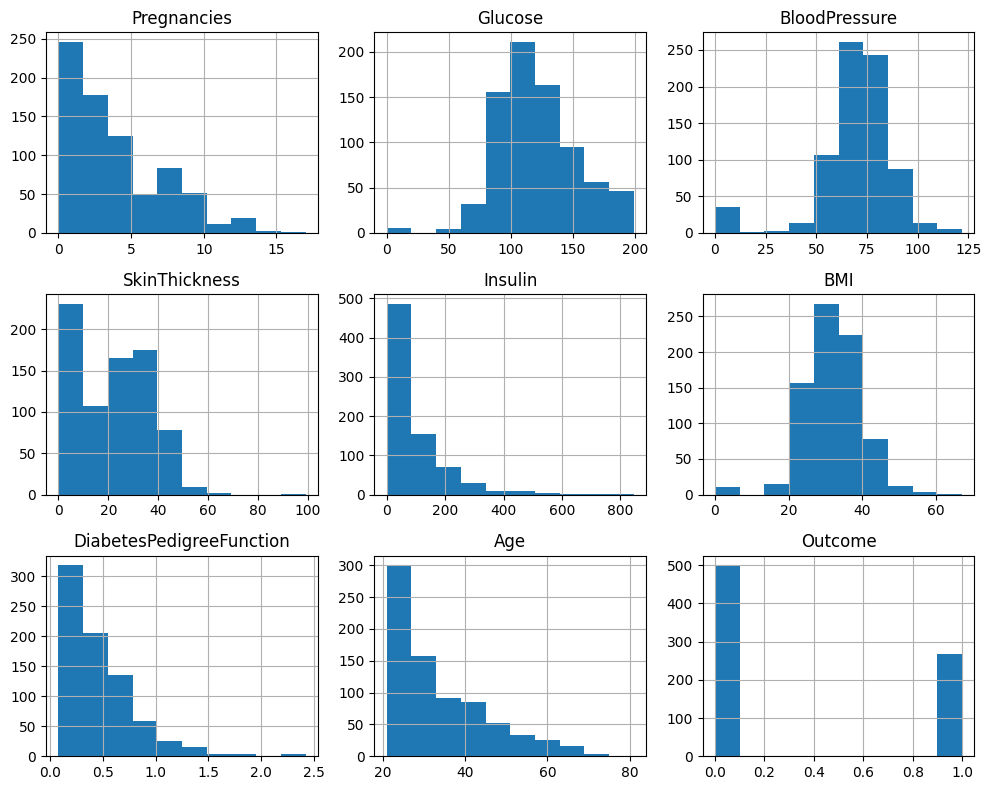

In [30]:
# Plotar histogramas
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



Agora posso plotar um mapa de calor para verificar a correlação entre as variáveis:

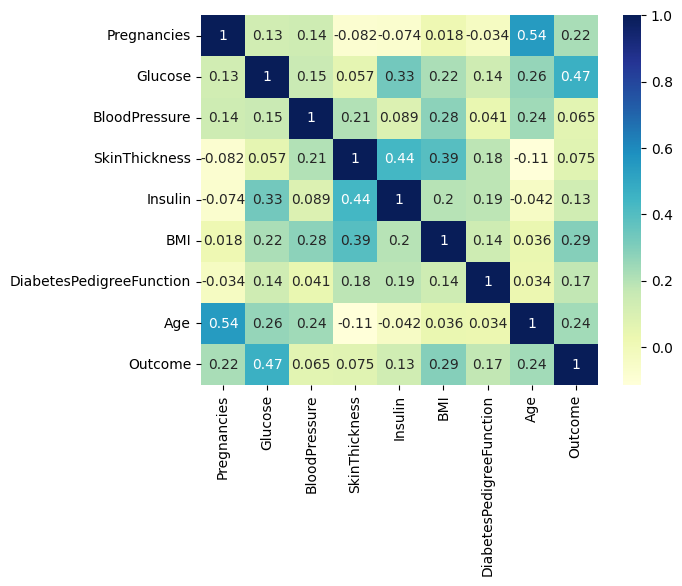

In [31]:
# Plotar mapa de calor
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()



Agora vou dividir os dados em conjunto de treinamento e teste e escalar os dados:

In [32]:
# Dividir dados em conjunto de treinamento e teste
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




Vou criar e ajustar o modelo de Regressão Logística:

In [33]:
# Criar modelo de Regressão Logística
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=42)

Agora vou prever as classes para os dados de teste, calcular a acurácia do modelo e plotar uma matriz de confusão:

Acurácia: 0.7532467532467533



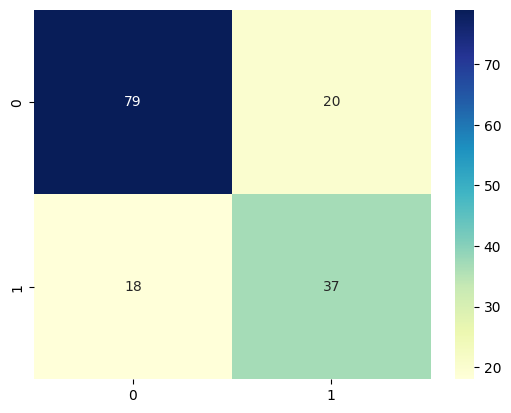

In [34]:
# Prever classes e calcular acurácia
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia: {accuracy}\n")

# Plotar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()



Por fim, vou plotar a curva ROC para avaliar o desempenho do modelo:

Text(0.5, 1.0, 'ROC Curve')

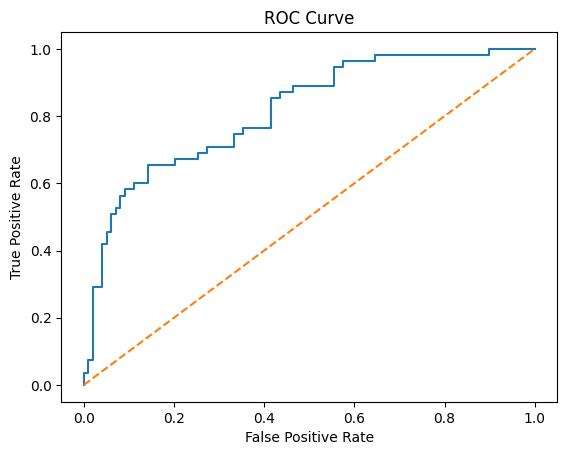

In [35]:
# Plotar curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
